In [20]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join("..", "src")))
from data_load import load_data

In [26]:
df=load_data('../data/MachineLearningRating_v3.txt')

c:\Users\hp\Desktop\10 academy\week 3\src\data_load.py:14: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='|', header=0)


In [27]:
df.describe(include='all')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1000098,1000098,1000098,1000098,1000098,854137,959866,...,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1.000098e+06,1.000098e+06
unique,NaN,NaN,23,2,4,6,5,1,11,3,...,13,28,22,14,5,4,1,1,NaN,NaN
top,NaN,NaN,2015-08-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,NaN,NaN
freq,NaN,NaN,106747,995075,895210,911929,933555,1000098,260811,597938,...,791235,104158,104183,824124,828125,915028,1000098,1000098,NaN,NaN
mean,1.048175e+05,7.956682e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.192982e+01,0.000000e+00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [14]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims', 'LossRatio'],
      dtype='object')

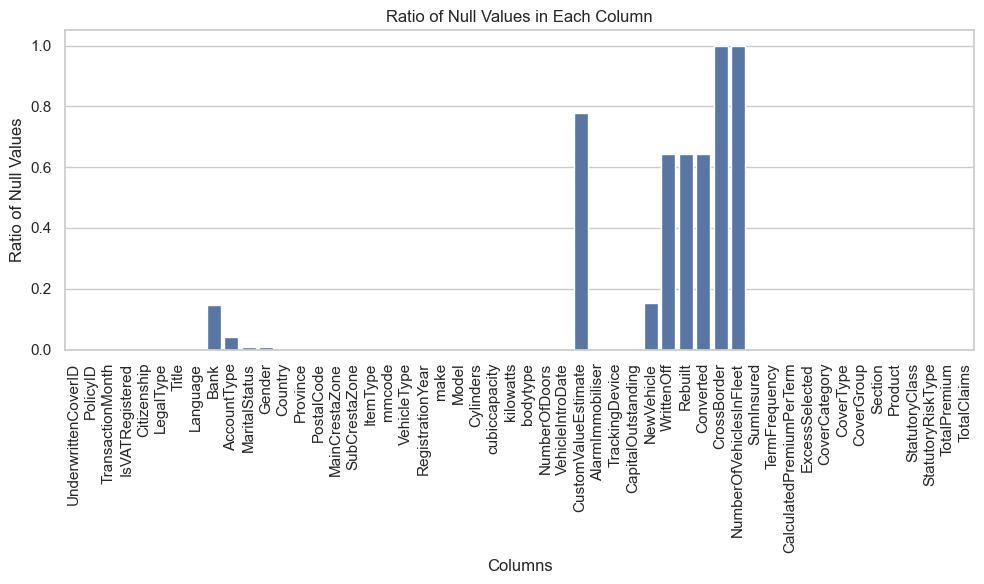

In [29]:
#plot ratio of null values
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=df.isnull().mean().index, y=df.isnull().mean().values)
plt.xticks(rotation=90)
plt.title('Ratio of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Ratio of Null Values')
plt.tight_layout()
plt.savefig('null_values_ratio.png')
plt.show()

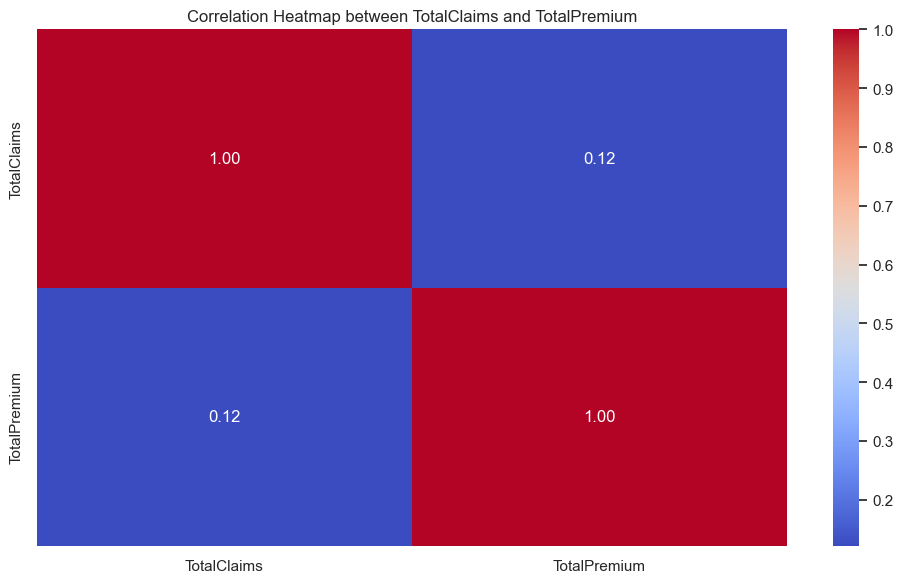

In [30]:
#univariate analysis using heatmaps on TotalClaims and TotalPremium
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.heatmap(df[['TotalClaims', 'TotalPremium']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between TotalClaims and TotalPremium')
plt.tight_layout()
plt.show()

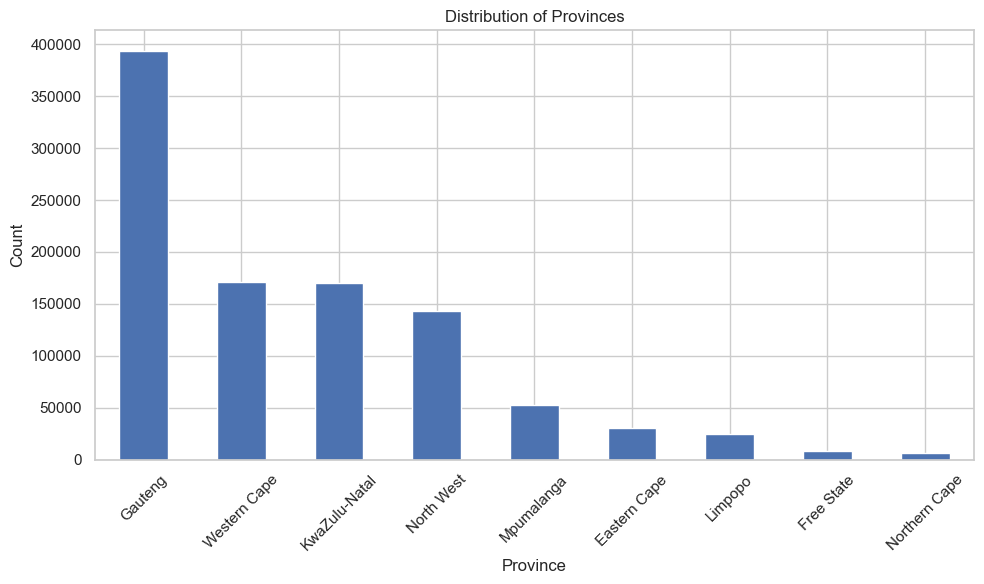

In [34]:
df['Province'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Provinces')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

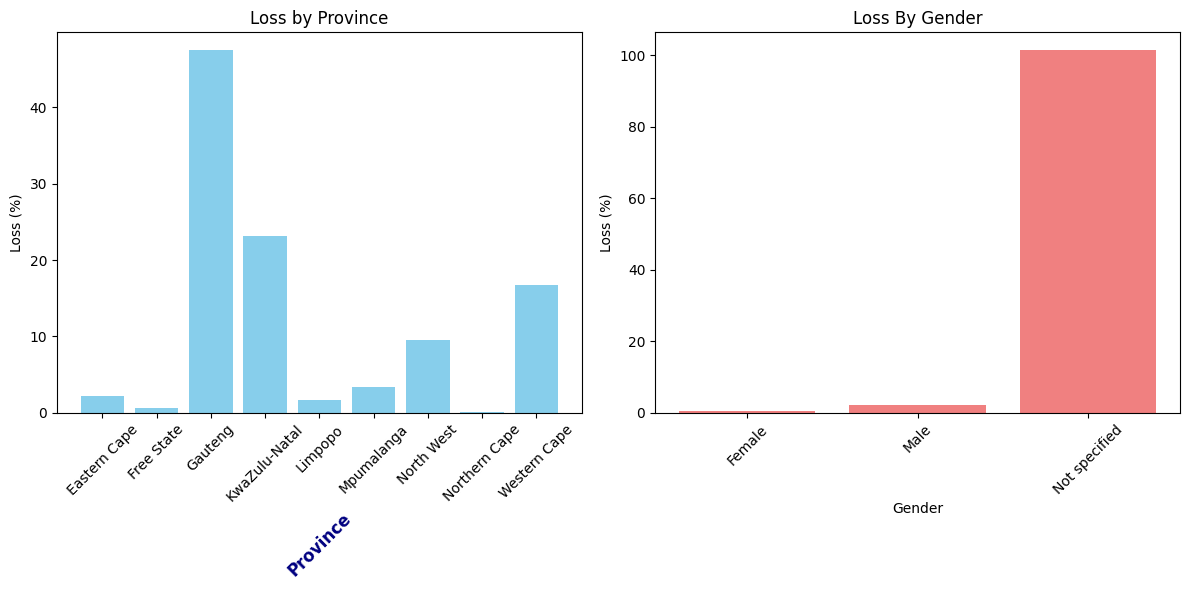

In [23]:
# Calculate overall loss per gender
loss_per_gender = df.groupby('Gender')['TotalClaims'].sum() / df['TotalPremium'].sum()*100
los_by_province = df.groupby('Province')['TotalClaims'].sum() / df['TotalPremium'].sum()*100
fig,ax=plt.subplots(1,2, figsize=(12, 6))
ax[0].bar(los_by_province.index, los_by_province.values, color='skyblue')
ax[0].set_title('Loss by Province')
ax[0].set_xlabel('Province', fontsize=12, fontweight='bold', color='navy', rotation=45)
ax[0].set_ylabel('Loss (%)')
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
ax[1].bar(loss_per_gender.index, loss_per_gender.values, color='lightcoral')
ax[1].set_title('Loss By Gender')
ax[1].set_xlabel("Gender")
ax[1].set_ylabel('Loss (%)')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_6212\1336528300.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_loss_ratio_by_province.index, y=mean_loss_ratio_by_province.values, palette='viridis')


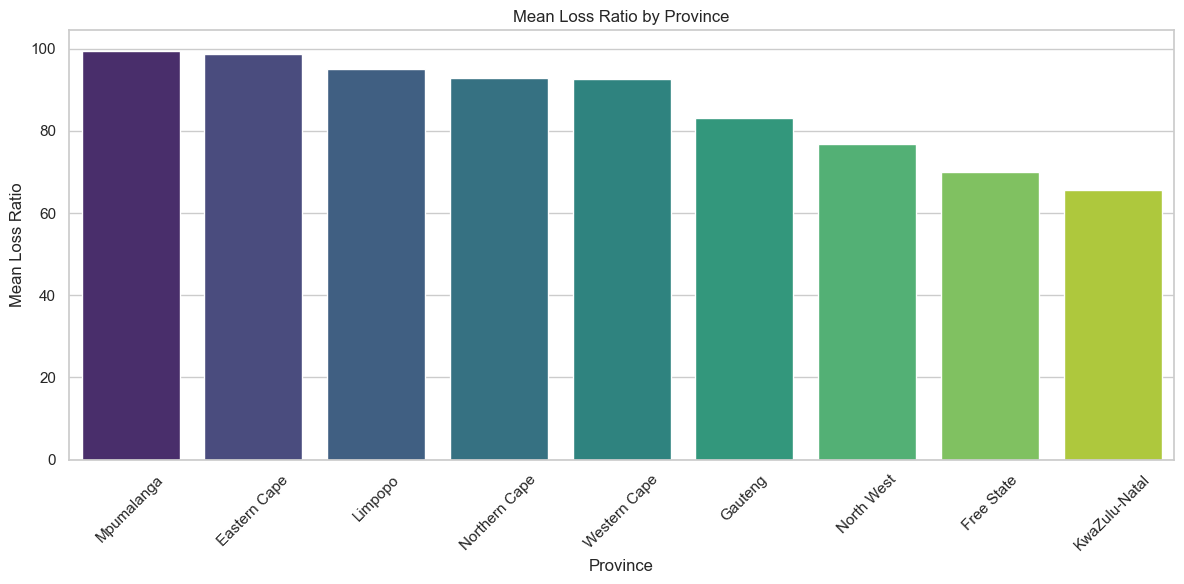

In [36]:
#calculate loss ratio passing zero values
df['TotalClaims'] = df['TotalClaims'].replace(0, np.nan)
df['TotalPremium'] = df['TotalPremium'].replace(0, np.nan)
#calculate loss ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
#gorup by province and calculate mean loss ratio
mean_loss_ratio_by_province = df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_loss_ratio_by_province.index, y=mean_loss_ratio_by_province.values, palette='viridis')
plt.title('Mean Loss Ratio by Province')
plt.xlabel('Province')
plt.ylabel('Mean Loss Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_6212\2109722403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_loss_ratio.index, y=mean_loss_ratio.values, palette='coolwarm')


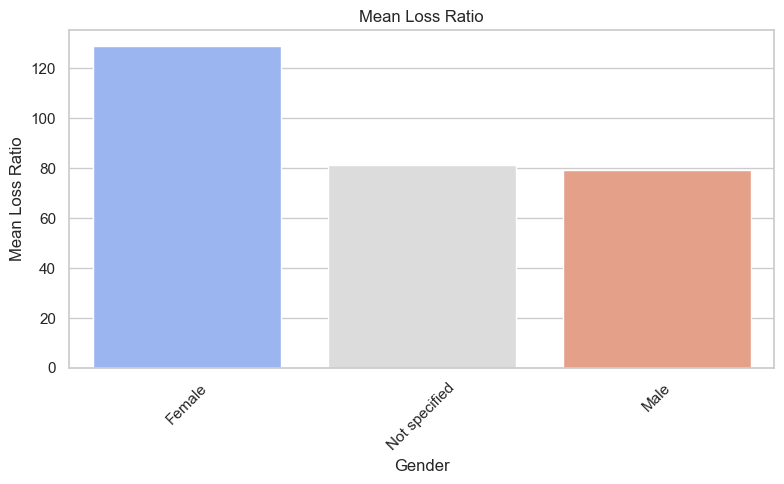

In [39]:
#plot loss ratio by Gender
mean_loss_ratio= df.groupby(df['Gender'])['LossRatio'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=mean_loss_ratio.index, y=mean_loss_ratio.values, palette='coolwarm')
plt.title('Mean Loss Ratio')
plt.xlabel('Gender')
plt.ylabel('Mean Loss Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

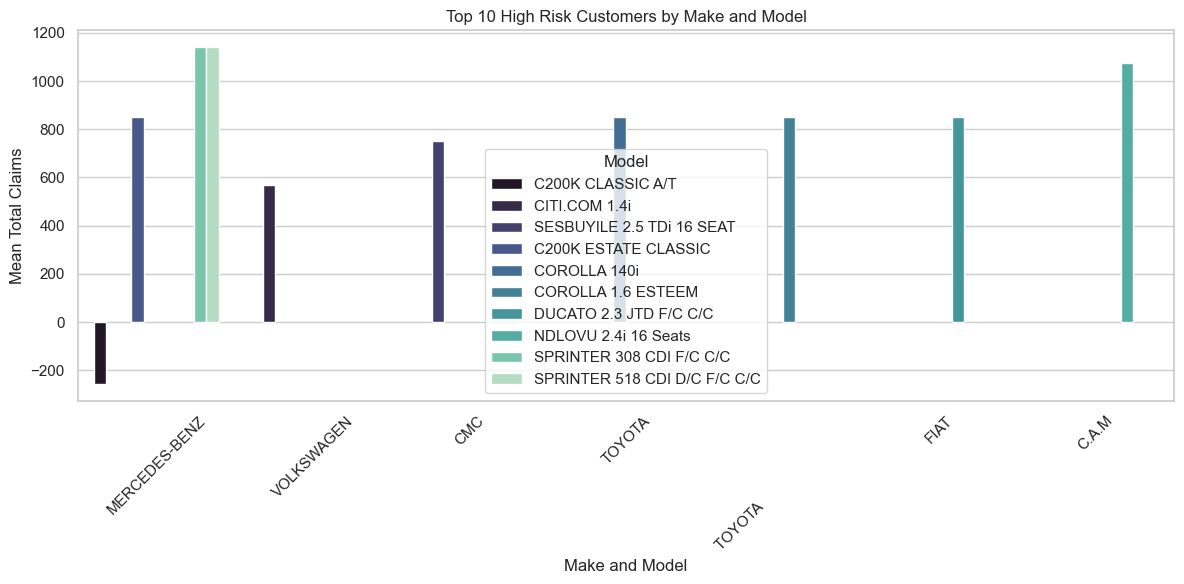

In [43]:
# Calculate the mean total claims for each combination of make and model
high_risk = df.groupby(['make', 'Model'])['TotalClaims'].mean().sort_values().head(10)

# Reset the index to flatten the MultiIndex
high_risk = high_risk.reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=high_risk, x='make', y='TotalClaims', hue='Model', palette='mako')
plt.title('Top 10 High Risk Customers by Make and Model')
plt.xlabel('Make and Model')
plt.ylabel('Mean Total Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].corr()


,TotalPremium,TotalClaims,CustomValueEstimate
TotalPremium,1.000000,0.133997,0.016397
TotalClaims,0.133997,1.000000,0.167092
CustomValueEstimate,0.016397,0.167092,1.000000


Number of outliers in TotalPremium: 106012


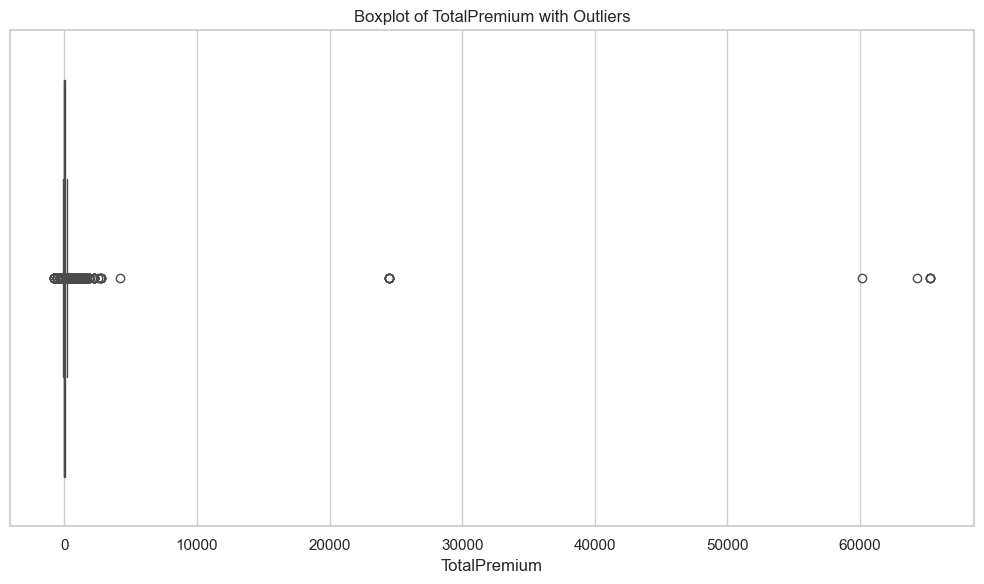

In [46]:
#detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
outliers = detect_outliers_iqr(df, 'TotalPremium')
print(f"Number of outliers in TotalPremium: {len(outliers)}")
# Plotting the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalPremium'])
plt.title('Boxplot of TotalPremium with Outliers')
plt.xlabel('TotalPremium')
plt.tight_layout()
plt.show()
